## SciPy

Numpy上に構築された数学パッケージ

### 画像をぼかす
古典的な画像の畳み込み、ガウシアン

ガウシアンカーネルを使って画像Iを畳み込むと以下の式で表せる

$$I_\sigma = I * G_\sigma$$

ガウシアンカーネルは次のように定義される標準偏差$\sigma$の2Dガウシアンカーネル  
$$G_\sigma = \frac{1}{2\pi\sigma}e^{-\frac{(x^2+y^2)}{2\sigma^2}}$$

#### ガウシアンフィルタについて
ガウシアンフィルタは、画像処理では写真の平滑化などに使われるフィルタの1つ  
ガウス分布を利用して「注目画素からの距離に応じて近傍の画素値に重みをかける」という処理を行い、自然な平滑化を実現する  
[参考：【画像処理】ガウシアンフィルタの原理・特徴・計算式](https://algorithm.joho.info/image-processing/gaussian-filter/)


ガウス分布&rarr;正規分布

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [3]:
from scipy.ndimage import  filters

/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3813570574.py:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im2 = filters.gaussian_filter(im, 5) # 標準偏差5のガウシアンフィルタ
/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3813570574.py:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im3 = filters.gaussian_filter(im, 15) # 標準偏差15のガウシアンフィルタ


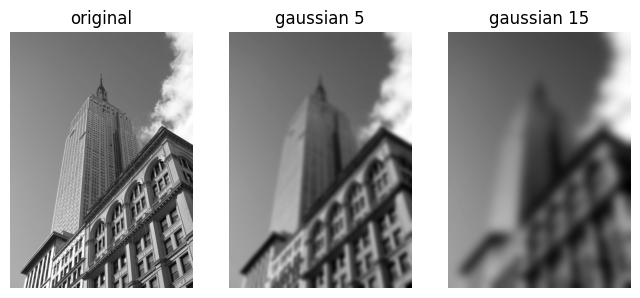

In [14]:
im = np.array(Image.open('../data/empire.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 5) # 標準偏差5のガウシアンフィルタ
im3 = filters.gaussian_filter(im, 15) # 標準偏差15のガウシアンフィルタ

plt.figure(figsize=(8,8))
plt.gray()
plt.subplot(1,3,1)
plt.imshow(im)
plt.axis('off')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(im2)
plt.axis('off')
plt.title('gaussian 5')

plt.subplot(1,3,3)
plt.imshow(im3)
plt.axis('off')
plt.title('gaussian 15')

plt.show()

/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3744370627.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im2[:,:,i] = filters.gaussian_filter(im[:,:,i],10)
/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3744370627.py:13: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im3[:,:,i] = filters.gaussian_filter(im[:,:,i],50)


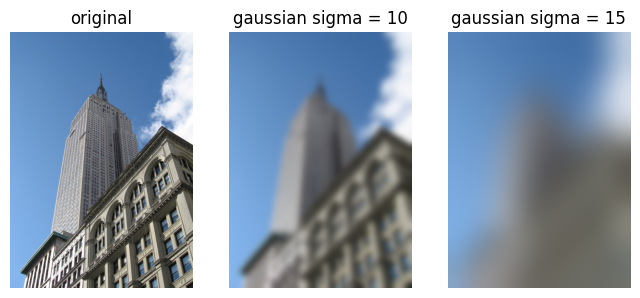

In [13]:
# シグマの値を増やすほどぼかしが強くなる

# カラーにガウシアンフィルタをかけるにはそれぞれの色チャンネルでフィルタをかける
im = np.array(Image.open('../data/empire.jpg'))
im2 = np.zeros(im.shape)
im3 = np.zeros(im.shape)

for i in range(3):
    im2[:,:,i] = filters.gaussian_filter(im[:,:,i],10)
im2 = np.uint8(im2)

for i in range(3):
    im3[:,:,i] = filters.gaussian_filter(im[:,:,i],50)
im3 = np.uint8(im3)

plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
plt.imshow(im)
plt.axis('off')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(im2)
plt.axis('off')
plt.title('gaussian sigma = 10')

plt.subplot(1,3,3)
plt.imshow(im3)
plt.axis('off')
plt.title('gaussian sigma = 50')
plt.show()

### 画像の微分
画像の明度をいけに変化させるかは重要

グレースケールのメイドはxとy方向の微分係数で表せる  
画像の勾配は$\nabla I=[I_x, I_y]^T$というベクトルになる

勾配の大きさは画像の明度の変化の大きさを表す  
また勾配の角度は画像条の各点における最も大きな明度変化の方向を表す  
$$\alpha = arctan2(I_y,I_x)$$

画像の微分を計算するには離散近似を行う、次のように畳み込みを行う
$$I_x = I * D 　かつ　 bI_y = I*D_y$$

DはPrewittフィルタとSobelフィルタ

/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/4043925845.py:7: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(im, 1, imx)
/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/4043925845.py:10: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(im, 0, imy)


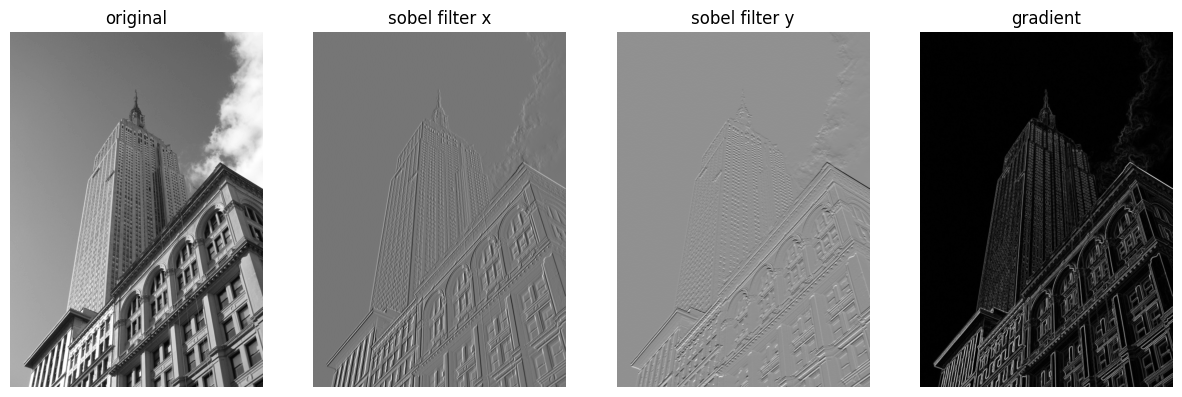

In [20]:
from scipy.ndimage import  filters

im = np.array(Image.open('../data/empire.jpg').convert('L'))

# Sobel微分係数フィルタ
imx = np.zeros(im.shape)
filters.sobel(im, 1, imx)

imy = np.zeros(im.shape)
filters.sobel(im, 0, imy)

magnitude = np.sqrt(imx**2+ imy**2)

imlist = [im, imx, imy, magnitude]
tlist = ['original', 'sobel filter x', 'sobel filter y', 'gradient']
plt.figure(figsize=(15,10))
plt.gray()

for i, im, title in zip(range(4), imlist, tlist):
    plt.subplot(1, 4, i+1)
    plt.imshow(im)
    plt.axis('off')
    plt.title(title)

x、y方向の微分と、勾配の大きさを計算  
solbe関数の第２引数に微分の方向を選択し、第３引数に出力を格納  

上記の方法だと画像の解像度に依存するため、がウシアンフィルタを用いた微分を使う

sigma = 0


/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3529846921.py:9: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)
/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3529846921.py:13: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (sigma,sigma), (0,1), imy)


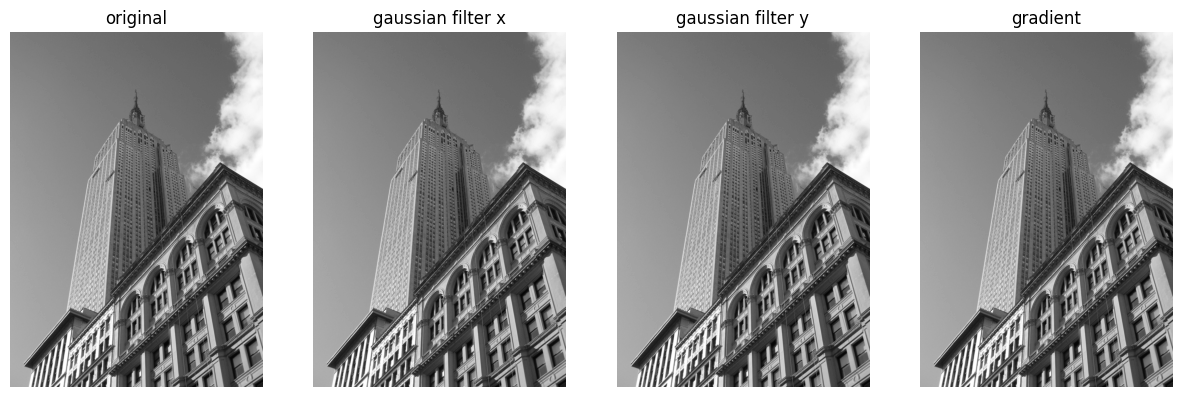

sigma = 2


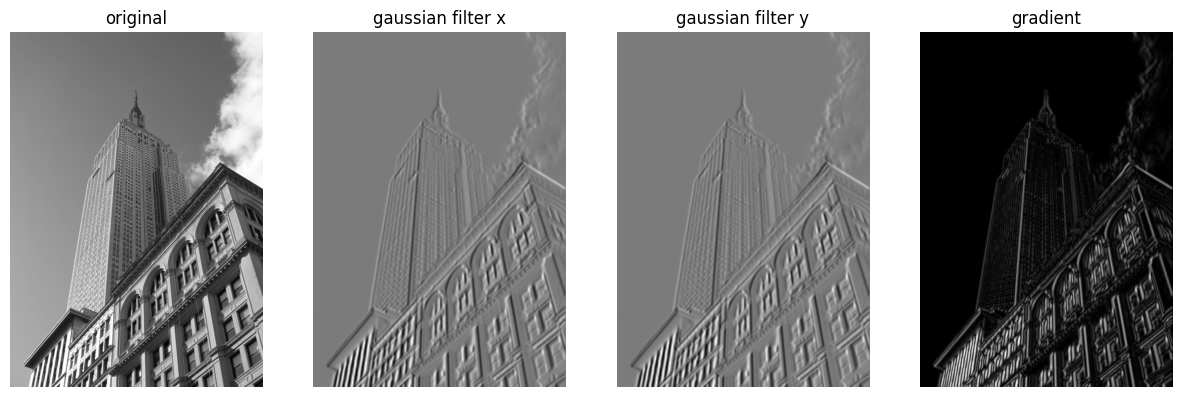

sigma = 5


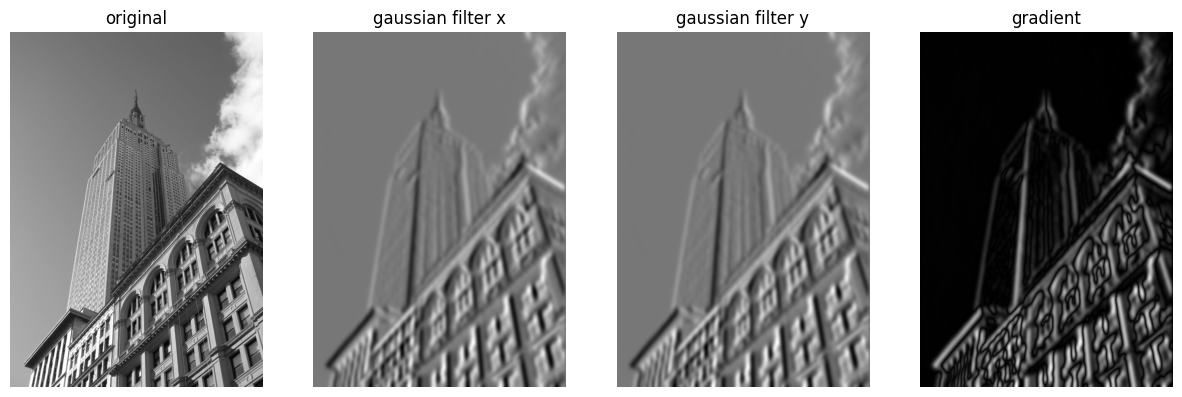

sigma = 10


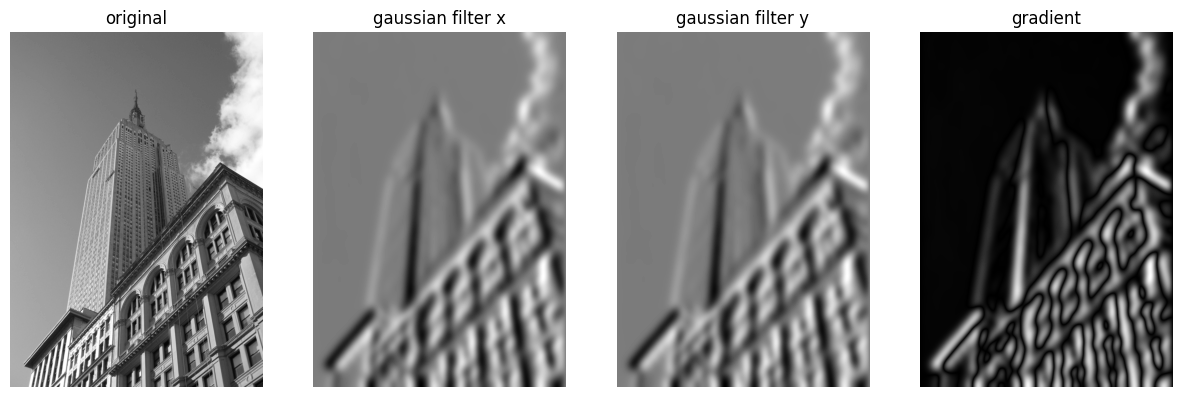

In [21]:
# テキストp.21図1-11。ただし、縦横の配置が逆で、sigma=0の行が含まれる
slist = [0, 2, 5, 10]

for sigma in slist:
    im = np.array(Image.open('../data/empire.jpg').convert('L'))
    print('sigma =', sigma)
    # X方向のガウシアンフィルタ
    imx = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imx)

    # X方向のガウシアンフィルタ
    imy = np.zeros(im.shape)
    filters.gaussian_filter(im, (sigma,sigma), (0,1), imy)

    magnitude = np.sqrt(imx**2 + imy**2)

    imlist = [im, imx, imy, magnitude]
    tlist = ['original', 'gaussian filter x', 'gaussian filter y', 'gradient']
    plt.figure(figsize=(15,10))
    plt.gray()
    for i, im, title in zip(range(4),imlist, tlist):
        plt.subplot(1,4,i+1)
        plt.imshow(im)
        plt.axis('off')
        plt.title(title)
    plt.show()

### モルフォロジー：　物体を数える
モルフォロジー：基本図形を計測したり解析したりするための手法の枠組み

Number of object : 45


/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3869095668.py:8: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  labels, nbr_objects = measurements.label(im)


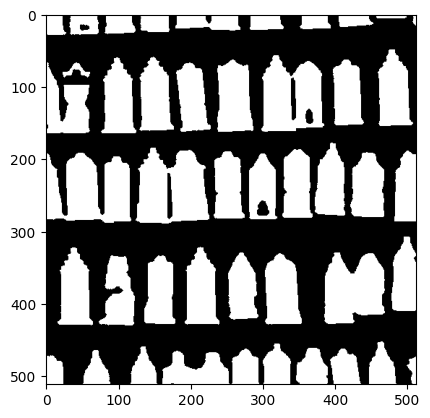

In [25]:
from scipy.ndimage import measurements, morphology

im = np.array(Image.open('../data/houses.png').convert('L'))
# 閾値処理により2直化
im = 1*(im<128) #ブール値の配列に１をかけることで変換

# label関数を用いて物体を見つけてぼっ対ごとにピクセル値として整数ラベル番号を割り当て
labels, nbr_objects = measurements.label(im)
plt.figure()
plt.imshow(im)
print(f"Number of object : {nbr_objects}")


Number of objects: 48


/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3642507499.py:4: DeprecationWarning: Please use `binary_opening` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  im_open = morphology.binary_opening(im, np.ones((9,5)), iterations=2)
/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_70292/3642507499.py:5: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  labels_open, nbr_objects_open = measurements.label(im_open)


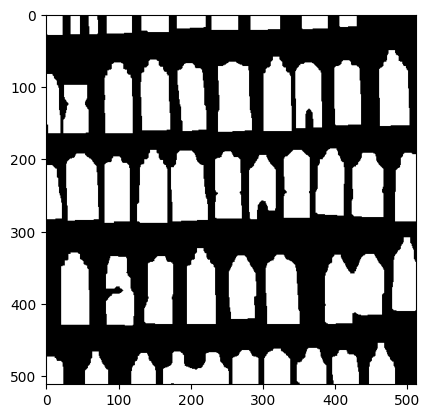

In [29]:
# 物体の繋がってる箇所はOpening演算をこれを除去できる

# モルフォロジー：　物体を分解する
im_open = morphology.binary_opening(im, np.ones((9,5)), iterations=2)
labels_open, nbr_objects_open = measurements.label(im_open)
print(f"Number of objects: {nbr_objects_open}")
plt.figure()
plt.imshow(im_open)

### 便利なSciPyモジュール

#### 配列を画像として保存する

In [ ]:
from scipy.misc import imsave

im = 
imsave('test.jpg',im)